In [1]:
import gym

In [2]:
import numpy as np

In [3]:
import random

In [4]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
env = gym.make('FrozenLake-v0')

In [8]:
tf.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [9]:
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)

In [10]:
W = tf.Variable(tf.random_uniform([16,4],0,0.01))

In [11]:
Qout = tf.matmul(inputs1,W)

In [12]:
predict = tf.argmax(Qout, 1)

In [13]:
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)

In [14]:
loss = tf.reduce_sum(tf.square(nextQ - Qout))

In [15]:
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [16]:
updateModel = trainer.minimize(loss)

In [17]:
init = tf.global_variables_initializer()

In [23]:
y = 0.99
e = 0.1
num_episodes = 10000

In [24]:
jList = []
rList = []

In [25]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            # 前回のstatusからQ値を予測
            a,allQ = sess.run([predict,Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            # εグリーディー(ランダムな手を打たせる）
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            s1,r,d,_ = env.step(a[0])
            # 次のQ値の推定値を求める
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            # Q値のターゲットを更新する
            targetQ[0,a[0]] = r + y*maxQ1
            
            # 新しい重みを求める
            _,W1 = sess.run([updateModel,W], feed_dict={inputs1: np.identity(16)[s:s+1], nextQ: targetQ})
            rAll += r
            s = s1
            if d == True:
                # イプシロン（exploreの閾値）を更新
                e = 1.0/((i/50) + 10)
                break
        jList.append(j) # 試行回数のリスト
        rList.append(rAll) # 報酬のリスト
        
print("Success Episode Ratio: " + str(sum(rList) / num_episodes*100) + "%")

Success Episode Ratio: 41.21%


In [26]:
plt.plot(rList)

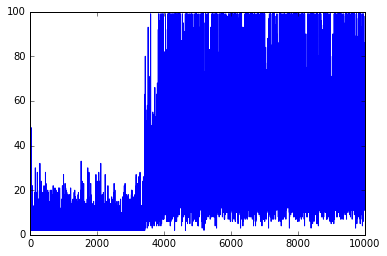

In [27]:
plt.plot(jList)